# Heart Diesase Prediction

## Loading and Visualizing the dataset

`Dataset Infomation`
- id: Unique id for each row
- age: Age of the patient in years
- dataset: Place of study
- sex: Gender (male/female)
- cp: chest pain type
    -- Typical angina
    -- Antypical angina
    -- Non-anginal
    -- Asymptotic
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholestrol level in mg/dl
- fbs: Fasting blood sugar level (True/False)
- restecg: Resting ECG results
    -- Normal
    -- ST-T abnormality
    -- Left ventricular hypertrophy
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina (True/False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
- ca: Number of major vessels (0-3) coloured by fluoroscopy
- thal: Thallium stress test result
    -- Normal
    -- Fixed defect
    -- Reversible defect
- num: The predicted attribute

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
# Sumary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 920
Number of columns: 16


In [7]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [8]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
# list all the features of the dataset

df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [10]:
# Describe only the object data type

df.describe(include = ['O'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [11]:
# Describe only the numerical data type

df.describe(include = ["number"])

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [12]:
# remove the columns id and dataset which is not much significant for us and make the changes directly to the original data

df.drop(columns=["id", "dataset"], inplace=True)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [14]:
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

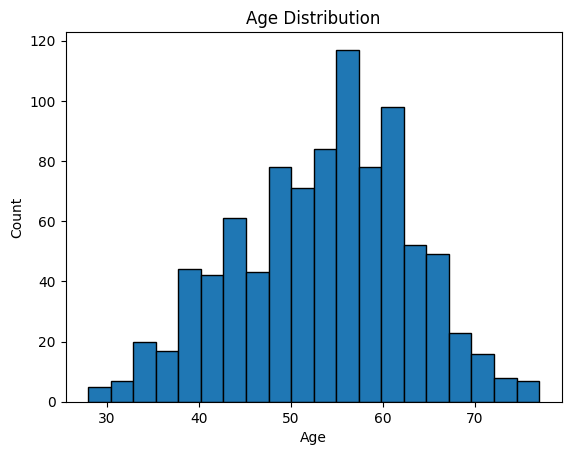

In [15]:
# Plot the age distribution
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

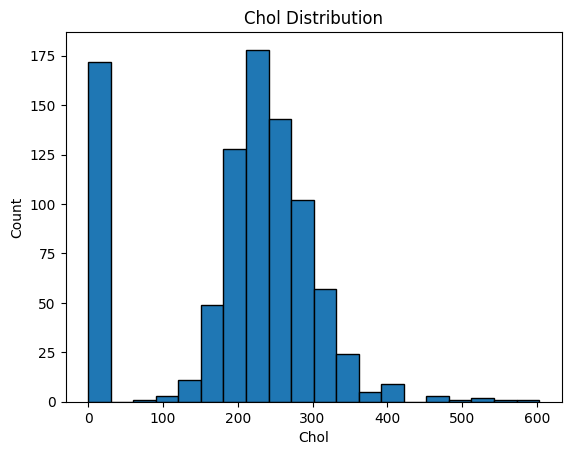

In [16]:
# Plot the age distribution
plt.hist(df['chol'], bins=20, edgecolor='black')
plt.xlabel('Chol')
plt.ylabel('Count')
plt.title('Chol Distribution')
plt.show()

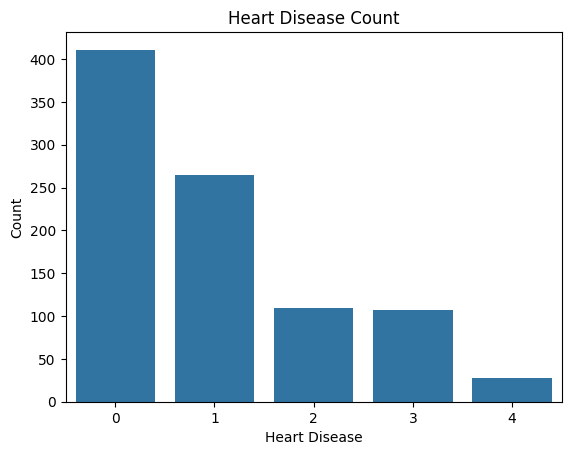

In [17]:
# bar plot to view the number of people with and without heart disease

sns.countplot(x='num', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Count')
plt.show()

<Axes: >

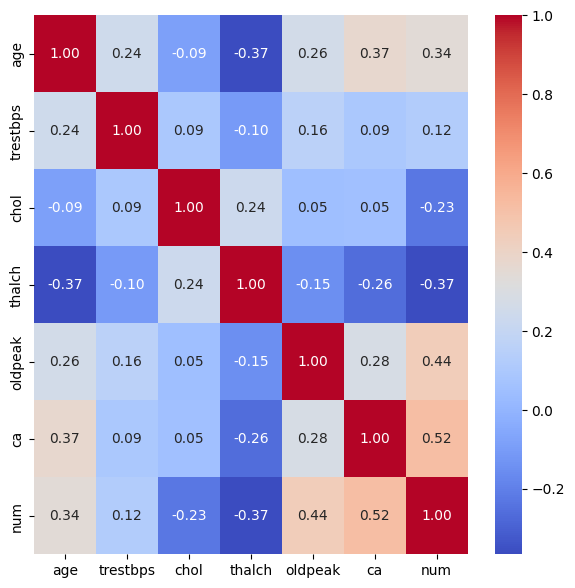

In [18]:
# Correlation matrix visualization

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')

## Data Preprocessing

In [19]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [20]:
# checking all the missing values

null_info = df.isnull().sum()
print(null_info)
print("\n")
print("The total number of missing values in the dataset is: ", null_info.sum())


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


The total number of missing values in the dataset is:  1759


#### Handling missing: restecg

In [21]:
df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [22]:
# get the two missing values from restecg column

df[df["restecg"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,55,Male,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,NaN,NaN,NaN,1
598,34,Male,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1


In [23]:
# handle this by replacing the missing values with the mode of the column

df["restecg"].fillna(df["restecg"].mode()[0], inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_10596\3009400471.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["restecg"].fillna(df["restecg"].mode()[0], inplace=True)


In [24]:
# view the 571 and 598 index rows

df.loc[[571, 598]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,55,Male,typical angina,140.0,295.0,False,normal,136.0,False,0.0,NaN,NaN,NaN,1
598,34,Male,asymptomatic,115.0,0.0,NaN,normal,154.0,False,0.2,upsloping,NaN,NaN,1


In [25]:
null_info = df.isnull().sum()
print(null_info)

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


#### handling missing: trestbps

In [26]:
df["trestbps"]

0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
915    127.0
916      NaN
917    122.0
918      NaN
919    120.0
Name: trestbps, Length: 920, dtype: float64

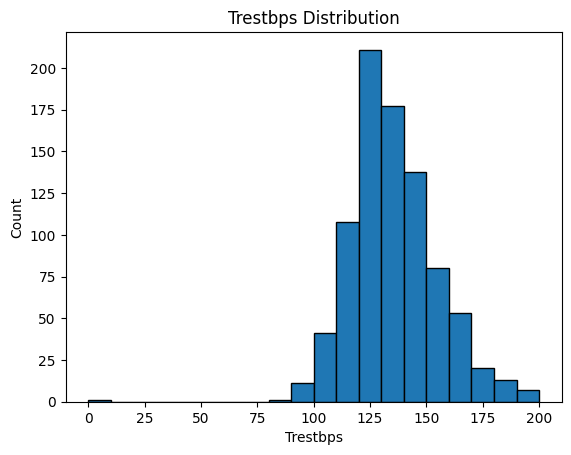

In [27]:
# visualize trestbps column

plt.hist(df['trestbps'], bins=20, edgecolor='black')
plt.xlabel('Trestbps')
plt.ylabel('Count')
plt.title('Trestbps Distribution')
plt.show()

In [28]:
# fill the missing values with the median of the column

# Filling the "trestbps" column with the median  to handle missing values in a dataset. The median is the middle value of a dataset when it is sorted in ascending order. It is a robust measure of central tendency that is less affected by outliers compared to the mean.

df["trestbps"].fillna(df["trestbps"].median(), inplace=True)

In [29]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

#### Handling missing: chol

In [30]:
df["chol"].dtype, df["chol"].isnull().sum()

(dtype('float64'), 30)

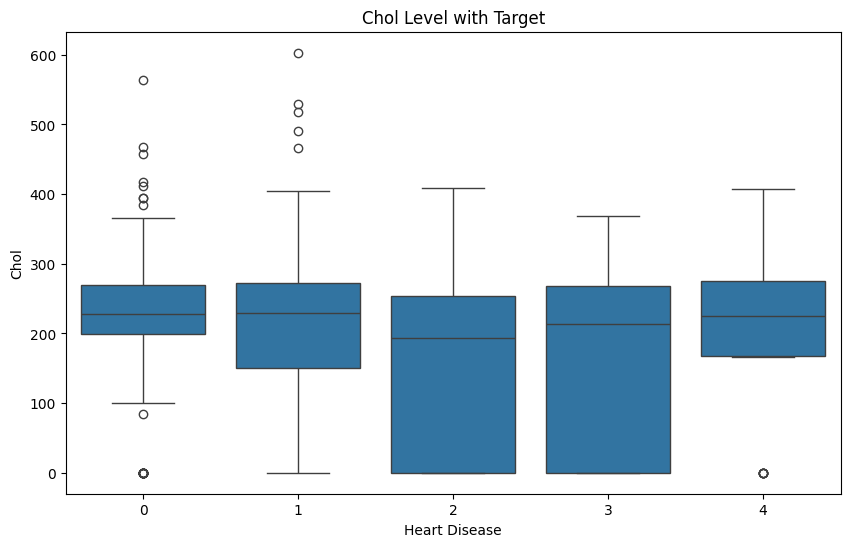

In [31]:
# view chol level with the target

plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='chol', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Chol')
plt.title('Chol Level with Target')
plt.show()

In [32]:
# how to handle this chol missing value

# Filling the "chol" column with the median to handle missing values in a dataset. The median is the middle value of a dataset when it is sorted in ascending order. It is a robust measure of central tendency that is less affected by outliers compared to the mean.

df["chol"].fillna(df["chol"].median(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_10596\2412696041.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chol"].fillna(df["chol"].median(), inplace=True)


#### Handling missing: ca

In [33]:
df["ca"].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [34]:
# simply dropping the ca column because it has 611 missing values out of 920 rows

df.drop(columns=["ca"], inplace=True)

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [36]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

#### Handling missing: thalch

In [37]:
df["thalch"][:10]

0    150.0
1    108.0
2    129.0
3    187.0
4    172.0
5    178.0
6    160.0
7    163.0
8    147.0
9    155.0
Name: thalch, dtype: float64

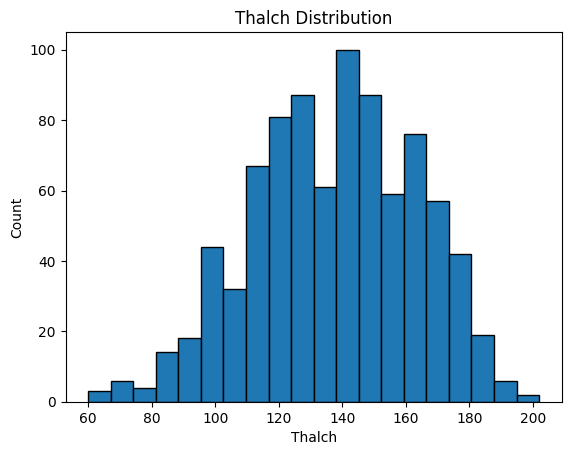

In [38]:
# visualize thalch

plt.hist(df['thalch'], bins=20, edgecolor='black')
plt.xlabel('Thalch')
plt.ylabel('Count')
plt.title('Thalch Distribution')
plt.show()

In [39]:
df["thalch"].fillna(df["thalch"].median(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_10596\2390850034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["thalch"].fillna(df["thalch"].median(), inplace=True)


#### Handling missing: fbs

In [40]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       0
thalch        0
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

In [41]:
df["fbs"].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

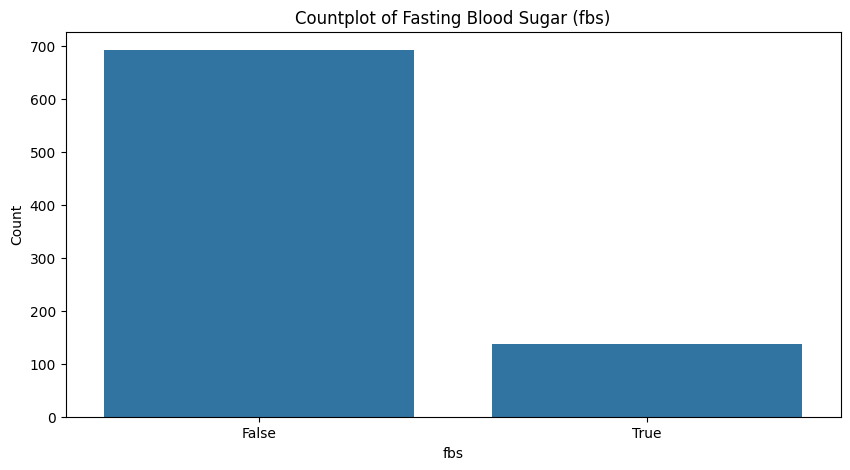

In [42]:
# Countplot for 'fbs' column
plt.figure(figsize=(10, 5))
sns.countplot(x='fbs', data=df)
plt.title('Countplot of Fasting Blood Sugar (fbs)')
plt.xlabel('fbs')
plt.ylabel('Count')
plt.show()

In [43]:
# Mode Imputation:

df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_10596\2941648968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_10596\2941648968.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'].fillna(df['fbs'].mode()[0]

In [44]:

df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

#### Handling missing: exang

In [45]:
df["exang"].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [46]:
df['exang'].fillna(df['exang'].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_10596\318069990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_10596\318069990.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'].fillna(df['exang'].mod

#### Handling missing: oldpeak

In [47]:
df["oldpeak"].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [48]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_10596\682706077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [49]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
thal        486
num           0
dtype: int64

In [50]:
df["slope"].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

## Handling categorical data

In [51]:
categorical_columns = df.select_dtypes(include=["O"])
categorical_columns

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,asymptomatic,lv hypertrophy,flat,normal
2,Male,asymptomatic,lv hypertrophy,flat,reversable defect
3,Male,non-anginal,normal,downsloping,normal
4,Female,atypical angina,lv hypertrophy,upsloping,normal
...,...,...,...,...,...
915,Female,asymptomatic,st-t abnormality,NaN,NaN
916,Male,typical angina,st-t abnormality,NaN,NaN
917,Male,asymptomatic,st-t abnormality,NaN,fixed defect
918,Male,asymptomatic,lv hypertrophy,NaN,NaN


In [52]:
# mapping sex to numeric values
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})

In [53]:
df["sex"].value_counts()

sex
1    726
0    194
Name: count, dtype: int64

In [54]:
# OHE the cp column as it has 4 categories

df = pd.get_dummies(df, columns=["cp"], prefix="cp", dtype=int)

In [55]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0,0,0,0,1
1,67,1,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2,1,0,0,0
2,67,1,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1,1,0,0,0
3,37,1,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0,0,0,1,0
4,41,0,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0,0,1,0,0


In [56]:
df.isnull().sum()

age                     0
sex                     0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalch                  0
exang                   0
oldpeak                 0
slope                 309
thal                  486
num                     0
cp_asymptomatic         0
cp_atypical angina      0
cp_non-anginal          0
cp_typical angina       0
dtype: int64

#### Handling missing: Thal

In [59]:
# simply drop the thal columns

df = df.drop(columns=["thal"])

In [60]:
df.isnull().sum()

age                     0
sex                     0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalch                  0
exang                   0
oldpeak                 0
slope                 309
num                     0
cp_asymptomatic         0
cp_atypical angina      0
cp_non-anginal          0
cp_typical angina       0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 920 non-null    int64  
 1   sex                 920 non-null    int64  
 2   trestbps            920 non-null    float64
 3   chol                920 non-null    float64
 4   fbs                 920 non-null    bool   
 5   restecg             920 non-null    object 
 6   thalch              920 non-null    float64
 7   exang               920 non-null    bool   
 8   oldpeak             920 non-null    float64
 9   slope               611 non-null    object 
 10  num                 920 non-null    int64  
 11  cp_asymptomatic     920 non-null    int32  
 12  cp_atypical angina  920 non-null    int32  
 13  cp_non-anginal      920 non-null    int32  
 14  cp_typical angina   920 non-null    int32  
dtypes: bool(2), float64(4), int32(4), int64(3), object(2)
mem

In [62]:
df["restecg"].value_counts()

restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "restecg" column
df["restecg"] = label_encoder.fit_transform(df["restecg"])

In [67]:
label_encoder.classes_, label_encoder

array([0, 1, 2])

normal: 1
lv hypertrophy: 0
st-t abnormality: 2

In [66]:
df["restecg"].value_counts()

restecg
1    553
0    188
2    179
Name: count, dtype: int64

In [70]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,True,0,150.0,False,2.3,downsloping,0,0,0,0,1
1,67,1,160.0,286.0,False,0,108.0,True,1.5,flat,2,1,0,0,0
2,67,1,120.0,229.0,False,0,129.0,True,2.6,flat,1,1,0,0,0
3,37,1,130.0,250.0,False,1,187.0,False,3.5,downsloping,0,0,0,1,0
4,41,0,130.0,204.0,False,0,172.0,False,1.4,upsloping,0,0,1,0,0


In [71]:
df[["fbs", "exang"]] = df[["fbs", "exang"]].astype(int)

In [73]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,downsloping,0,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,flat,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,flat,1,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,downsloping,0,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,upsloping,0,0,1,0,0


In [74]:
df["slope"].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [75]:
df.isnull().sum()

age                     0
sex                     0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalch                  0
exang                   0
oldpeak                 0
slope                 309
num                     0
cp_asymptomatic         0
cp_atypical angina      0
cp_non-anginal          0
cp_typical angina       0
dtype: int64

#### Imputation on slope: with "unknown" value

In [77]:
df["slope"][:10]

0    downsloping
1           flat
2           flat
3    downsloping
4      upsloping
5      upsloping
6    downsloping
7      upsloping
8           flat
9    downsloping
Name: slope, dtype: object

In [86]:
df["slope"].fillna("Unknown", inplace=True)

In [87]:
df.isnull().sum()

age                   0
sex                   0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalch                0
exang                 0
oldpeak               0
slope                 0
num                   0
cp_asymptomatic       0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64

In [88]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,downsloping,0,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,flat,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,flat,1,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,downsloping,0,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,upsloping,0,0,1,0,0


In [89]:
df["slope"].value_counts()

slope
flat           345
Unknown        309
upsloping      203
downsloping     63
Name: count, dtype: int64

In [91]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,downsloping,0,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,flat,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,flat,1,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,downsloping,0,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,upsloping,0,0,1,0,0


In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df["slope"])

df["slope"] = label_encoder.transform(df["slope"])

In [95]:
df["slope"].value_counts()

slope
2    345
0    309
3    203
1     63
Name: count, dtype: int64

in slope
0: unknown
1: downslopping
2: flat
3: upslopping

# Scaling the dataset

In [96]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,131.995652,199.908696,0.150000,0.990217,137.692391,0.366304,0.878788,1.480435,0.995652,0.539130,0.189130,0.221739,0.050000
std,9.424685,0.408148,18.451300,109.040171,0.357266,0.631863,25.145235,0.482056,1.053774,1.167966,1.142693,0.498738,0.391825,0.415642,0.218063
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.800000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
df.isnull().sum()

age                   0
sex                   0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalch                0
exang                 0
oldpeak               0
slope                 0
num                   0
cp_asymptomatic       0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64

In [98]:
df.head(10)

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,1,0,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,2,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,2,1,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,1,0,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,3,0,0,1,0,0
5,56,1,120.0,236.0,0,1,178.0,0,0.8,3,0,0,1,0,0
6,62,0,140.0,268.0,0,0,160.0,0,3.6,1,3,1,0,0,0
7,57,0,120.0,354.0,0,1,163.0,1,0.6,3,0,1,0,0,0
8,63,1,130.0,254.0,0,0,147.0,0,1.4,2,2,1,0,0,0
9,53,1,140.0,203.0,1,0,155.0,1,3.1,1,1,1,0,0,0


# Model Building

In [99]:
features = df.drop(columns=["num"])
target = df["num"]

In [100]:
features.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,1,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,2,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,1,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,3,0,1,0,0


In [106]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [103]:
# splitting the dataset into Training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [104]:
X_train.shape, X_test.shape

((736, 14), (184, 14))

## Model 1:

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

In [110]:
y_preds_rf = rf_classifier.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_preds_rf)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_preds_rf))

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        79
           1       0.49      0.57      0.52        60
           2       0.27      0.14      0.18        22
           3       0.17      0.11      0.13        18
           4       0.00      0.00      0.00         5

    accuracy                           0.57       184
   macro avg       0.33      0.33      0.32       184
weighted avg       0.52      0.57      0.54       184



C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=2)

In [116]:
y_preds_rf_scaled = rf_classifier.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_preds_rf_scaled)
classification_report_rf_scaled = classification_report(y_test, y_preds_rf_scaled)

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [118]:
print(f"The acuracy for scaled data in random forest is: {accuracy*100:.2f} %")

The acuracy for scaled data in random forest is: 56.52 %


In [120]:
print(classification_report_rf_scaled)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        79
           1       0.47      0.55      0.51        60
           2       0.27      0.14      0.18        22
           3       0.15      0.11      0.13        18
           4       0.00      0.00      0.00         5

    accuracy                           0.57       184
   macro avg       0.33      0.33      0.32       184
weighted avg       0.52      0.57      0.54       184



## Model 2: Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=2)

log_reg.fit(X_train_scaled, y_train)

y_preds_log_reg = log_reg.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_preds_log_reg))

Accuracy:  0.5489130434782609


## Model 3: MLPClassifier

In [123]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()

mlp_classifier.fit(X_train_scaled, y_train)

y_preds_2 = mlp_classifier.predict(X_test)

print(accuracy_score(y_test, y_preds_2) * 100)

56.52173913043478


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
